# Compute spectrum for Wilson, Staggered, Overlap etc.
June 14, 2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import linalg as LA

In [2]:
%matplotlib widget

In [3]:
# w, v = LA.eig(np.diag((1, 2, 3)))

## Expressions
### Laplacian
$$ \psi^{'}(x) \sum_{\mu} \left[ \frac{\psi(x+\mu) + \psi(x-\mu) - 2 \psi(x) }{2a^2}  \right] $$ 

### Staggered fermions
$$ \psi(x)^{'} \sum_{\mu} \eta_{\mu}(x) \left[ \frac{\psi(x+\mu) - \psi(x-\mu)}{2a} \right] $$ 

### Naive fermions
$$ \psi(x)^{'} \sum_{\mu} \left[ \gamma_{\mu} \frac{\psi(x+\mu) - \psi(x-\mu)}{2a} \right] $$ 

### Wilson fermions
$$ \psi(x) \left\{ \frac{2+m}{a} \psi(x) - \sum_{\mu} \frac{1}{2a} \left[ ( 1 - \gamma_{\mu}) \psi(x+\mu) +  ( 1 + \gamma_{\mu}) \psi(x-\mu)  \right] \right\} $$ 

In [4]:
def f_get_A(name,L=16):
    if name=='staggered':
        # build A matrix
        Amat=np.zeros((L**2,L**2),dtype=np.float32)
        for x1 in range(L):
            for y1 in range(L):
                for x2 in range(L):
                    for y2 in range(L):
                        idx1=x1+y1*L; idx2=x2+y2*L;
                        if (y1==y2):
                            if (x2==x1+1 or ((x1==L-1)and (x2==0))): 
                                Amat[idx1,idx2]=1 
                            if (x2==x1-1 or ((x1==0)and (x2==L-1))): 
                                Amat[idx1,idx2]=-1
                            elif (x1==x2): 
                                # print("(%s,%s), (%s,%s), %s-%s"%(x1,y1,x2,y2,idx1,idx2))
                                Amat[idx1,idx2]=-m**2
                        if (x1==x2):
                            eta=(-1)**(x1)
                            if (y2==y1+1 or ((y1==L-1)and (y2==0))): 
                                Amat[idx1,idx2]=1 * eta
                            elif (y2==y1-1 or ((y1==0)and (y2==L-1))): 
                                Amat[idx1,idx2]=-1 * eta
                            elif (y1==y2): 
                                # print("(%s,%s), (%s,%s), %s-%s"%(x1,y1,x2,y2,idx1,idx2))
                                Amat[idx1,idx2]=-m**2

    elif name=='laplacian':
        Amat=np.zeros((L**2,L**2),dtype=np.float32)
        for x1 in range(L):
            for y1 in range(L):
                for x2 in range(L):
                    for y2 in range(L):
                        idx1=x1+y1*L; idx2=x2+y2*L;
                        if (y1==y2):
                            if (np.abs(x1-x2)==1 or np.abs(x1-x2)==L-1): # Can use a simpler expression since sign is 1 for both neighbours
                                Amat[idx1,idx2]=1
                            elif (x1==x2): 
                                # print("(%s,%s), (%s,%s), %s-%s"%(x1,y1,x2,y2,idx1,idx2))
                                Amat[idx1,idx2]=-4.0-m**2
                        if (x1==x2):
                            if (np.abs(y1-y2)==1 or np.abs(y1-y2)==L-1): 
                                Amat[idx1,idx2]=1
                                
    return Amat

def f_plot_spec(spec):
    plt.figure()
    arr=np.array([(i.real,i.imag) for i in spec])
    x,y=arr[:,0],arr[:,1]
    plt.plot(x,y,marker='*',linestyle='')
    plt.ylabel('Im')
    plt.xlabel('Re')
    

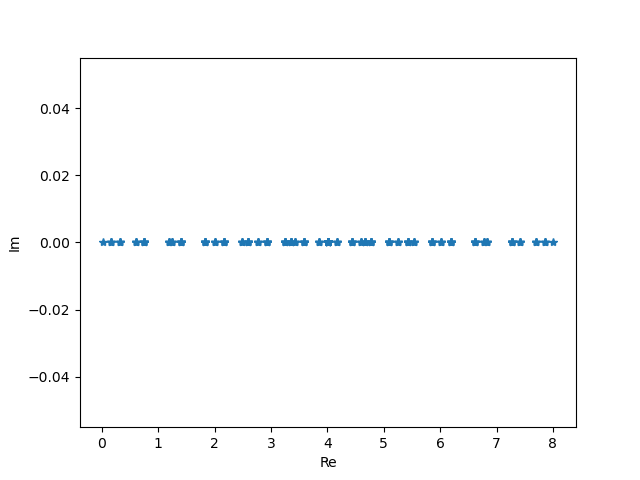

In [5]:
L=16
m=0.1
# build A matrix
A=f_get_A('laplacian',L)
spec=np.linalg.eigvals(-A)
# print(spec)      
f_plot_spec(spec)

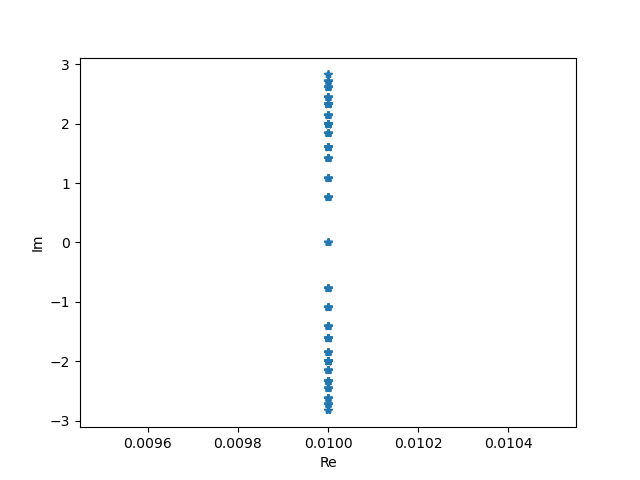

In [6]:
L=16
m=0.1
# build A matrix
A=f_get_A('staggered',L)
spec=np.linalg.eigvals(-A)
# print(spec)      
f_plot_spec(spec)

## 2D of 2D arrays

In [7]:
norm=np.sqrt(1/2.0)
norm=1.0
gamma_1=np.array([[0,1,],[1,0]],dtype='complex_')*norm
gamma_2=np.array([[0,-1j],[1j,0]],dtype='complex_')*norm
I=np.identity(2)*norm

In [8]:
np.linalg.norm(I)
gamma_2

array([[0.+0.j, 0.-1.j],
       [0.+1.j, 0.+0.j]])

In [9]:
# build A matrix
Amat=np.empty((L**2,L**2,2,2),dtype='complex_')

for x1 in range(L):
    for y1 in range(L):
        for x2 in range(L):
            for y2 in range(L):
                idx1=x1+y1*L; idx2=x2+y2*L;
                if (y1==y2):
                    if (x2==x1+1 or ((x1==L-1)and (x2==0))): 
                        Amat[idx1,idx2,:,:]=1*gamma_1
                    if (x2==x1-1 or ((x1==0)and (x2==L-1))): 
                        Amat[idx1,idx2,:,:]=-1*gamma_1
                    elif (x1==x2): 
                        Amat[idx1,idx2,:,:]=-m**2*I
                if (x1==x2):
                    if (y2==y1+1 or ((y1==L-1)and (y2==0))): 
                        Amat[idx1,idx2,:,:]=1*gamma_2
                    elif (y2==y1-1 or ((y1==0)and (y2==L-1))): 
                        Amat[idx1,idx2,:,:]=-1*gamma_2

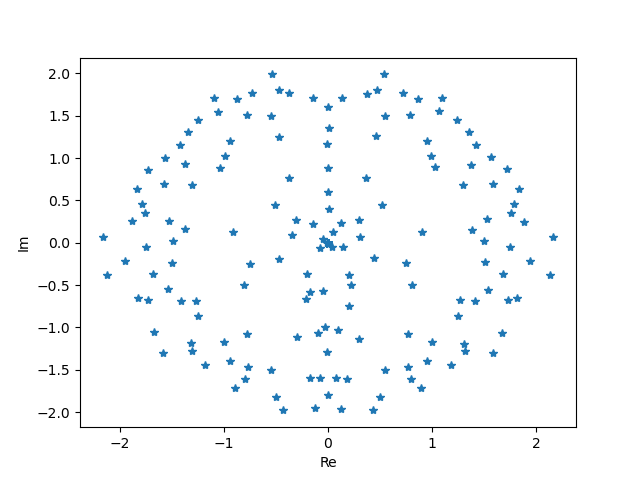

In [10]:
A=Amat.reshape((L**2*2,L**2*2))
spec=np.linalg.eigvals(A)
# print(spec)      
f_plot_spec(spec)

In [11]:
Amat.shape,spec.shape

((256, 256, 2, 2), (512,))

## Wilson fermions

In [12]:
gamma_1, gamma_2, I

(array([[0.+0.j, 1.+0.j],
        [1.+0.j, 0.+0.j]]),
 array([[0.+0.j, 0.-1.j],
        [0.+1.j, 0.+0.j]]),
 array([[1., 0.],
        [0., 1.]]))

In [13]:
I-gamma_2

array([[1.+0.j, 0.+1.j],
       [0.-1.j, 1.+0.j]])

In [39]:
np.dot(gamma_1,gamma_2) - np.dot(gamma_2,gamma_1)

array([[0.+2.j, 0.+0.j],
       [0.+0.j, 0.-2.j]])

In [14]:
gamma_1

array([[0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j]])

### Wilson fermions
$$ \psi(x) \left\{ ( 2+m ) \psi(x) - \sum_{\mu} \frac{1}{2} \left[ ( 1 - \gamma_{\mu}) \psi(x+\mu) +  ( 1 + \gamma_{\mu}) \psi(x-\mu)  \right] \right\} $$ 

In [43]:
L=32
m=0.1

In [44]:
# build A matrix
Amat=np.empty((L**2,L**2,2,2),dtype='complex_')

for x1 in range(L):
    for y1 in range(L):
        for x2 in range(L):
            for y2 in range(L):
                idx1=x1+y1*L; idx2=x2+y2*L;
                if (y1==y2):
                    if   (x2==x1+1 or ((x1==(L-1))and (x2==0))): 
                        Amat[idx1,idx2,:,:]=-1*0.5*(I-gamma_1)
                        # print(y1,y2,x1,x2)
                        # print(Amat[idx1,idx2,:,:])

                    elif (x2==x1-1 or ((x1==0)and (x2==(L-1)))): 
                        Amat[idx1,idx2,:,:]=-1*0.5*(I+gamma_1)
                        # print(y1,y2,x1,x2)
                        # print(Amat[idx1,idx2,:,:])
                        
                    elif (x1==x2): 
                        Amat[idx1,idx2,:,:]=(2+m)*I

                        # print(y1,y2,x1,x2)
                        # print(Amat[idx1,idx2,:,:])
                        
                elif (x1==x2):
                    if   (y2==y1+1 or ((y1==(L-1))and (y2==0))): 
                        Amat[idx1,idx2,:,:]=-1*0.5*(I-gamma_2)
                        
                        # print(y1,y2,x1,x2)
                        # print(Amat[idx1,idx2,:,:])
                        
                    elif (y2==y1-1 or ((y1==0)and (y2==(L-1)))): 
                        Amat[idx1,idx2,:,:]=-1*0.5*(I+gamma_2)
                        
                        # print(y1,y2,x1,x2)
                        # print(Amat[idx1,idx2,:,:])
                        

In [45]:
Amat.shape,

((1024, 1024, 2, 2),)

In [46]:
### This is wrong, don't do reshape. Manually create flattened array
# A2=Amat.reshape((L**2*2,L**2*2),order='C')
# spec=np.linalg.eigvals(A2)
# # print(spec)      
# f_plot_spec(spec)

In [47]:
# A3.shape,spec.shape

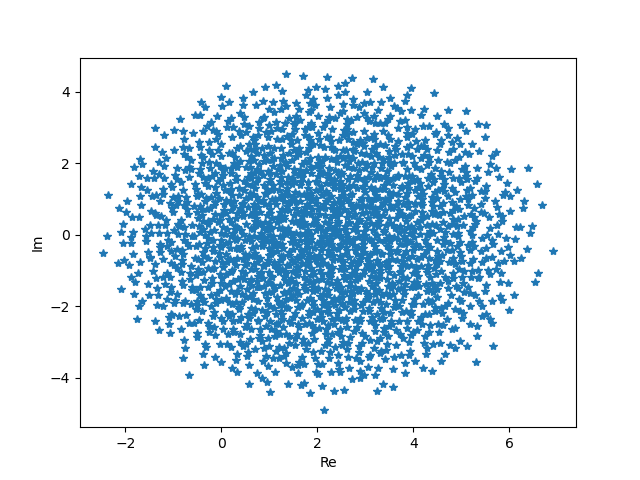

In [48]:
A3=np.empty((L**2*2,L**2*2),dtype='complex_')

for site1 in range(L**2):
    for site2 in range(L**2):
        for spin1 in range(2):
            for spin2 in range(2):
                A3[spin1+2*site1,spin2+2*site2]=Amat[site1,site2,spin1,spin2]
                
spec=np.linalg.eigvals(A3)
# print(spec)      
f_plot_spec(spec)

In [26]:
spec

array([0.1       +4.56492483e-15j, 4.08078528-1.95090322e-01j,
       4.1       +1.05552778e-14j, ..., 1.88322725+8.04019035e-01j,
       1.88322725-8.04019035e-01j, 2.1       -7.85694958e-01j])

### Analytical Wilson in 2D 

$$ \Lambda = (2+m) + 2 \cos k_x + 2 \cos k_y \pm 2 i \sqrt{\sin^2 k_x + \sin^2 k_y} $$
where $ k_x, k_y = \frac{2 \pi }{L} n $ with n = 0,1, ..L-1 

In [78]:
spec=np.empty(L**2*2,dtype='complex_')
# spec=np.ones(L**2*2,dtype='complex_')

In [79]:
for k_x in range(0,L): 
    for k_y in range(0,L):
        kx=(2.0*np.pi/L)*k_x
        ky=(2.0*np.pi/L)*k_y
        
        re=(2.0+m)+2* np.cos(kx) + 2 * np.cos(ky)
        im=2 * np.sqrt(np.sin(kx)**2 + np.sin(ky)**2)
        ans=complex(re,im)
        if np.abs(ans)<0.1: 
            print("anomaly",k_x,k_y,ans,np.abs(ans))
        # print(kx,ky,ans,np.abs(ans))
        
        spec[k_x + L * k_y + L**2 * 0 ]=complex(re,im)
        spec[k_x + L * k_y + L**2 * 1 ]=complex(re,-im)
        

In [80]:
np.min(np.abs(spec))

1.9

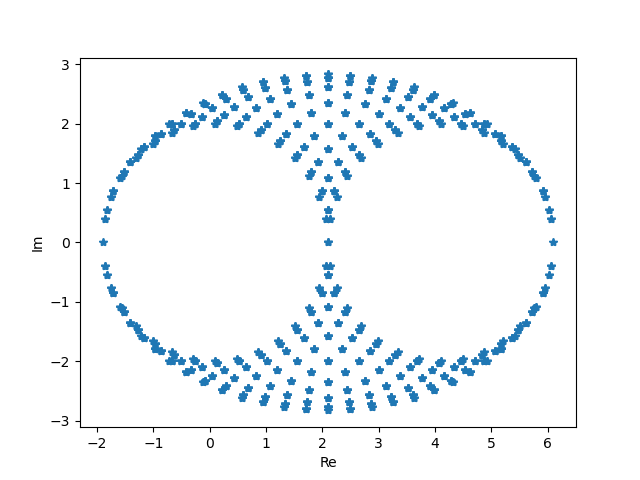

In [83]:
f_plot_spec(spec)

/var/folders/h9/cwkrp27n277dc6nk95nhr9bm0000gn/T/ipykernel_25473/843789738.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


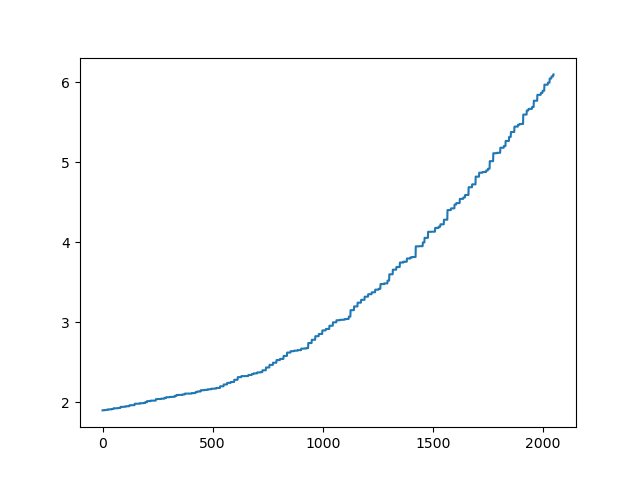

In [84]:
plt.figure()
plt.plot(np.sort(np.abs(spec)))